In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from glob import glob

### Load the Image Data

In [ ]:
images=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/*.jpg")

In [ ]:
len(images)

16393

In [ ]:
img2=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-2/*.jpg")

In [ ]:
len(img2)

6890

In [ ]:
img3=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-3/*.jpg")

In [ ]:
len(img3)

7662

In [ ]:
images[:5]

['/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/hhdoeK8SsiI.002.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/xHsh2Rg5ANU.000.mp4-00081.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/rxYWgXYTATs.001.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/V8w2Lo5wxl8.000.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/leslBYwG8kc.002.mp4-00001.jpg']

### **load the Text Data**

In [ ]:
text=pd.read_csv("/content/drive/MyDrive/data/personality-master/dataset/bigfive_labels.csv")

In [ ]:
text

,VideoName,ValueExtraversion,ValueAgreeableness,ValueConscientiousness,ValueNeurotisicm,ValueOpenness
0,GQczMGrVgbc.001.mp4,0.570093,0.703297,0.640777,0.666667,0.544444
1,-utrsarZeIY.004.mp4,0.523364,0.516484,0.436893,0.333333,0.411111
2,3HA2W1s4oP8.001.mp4,0.401869,0.538462,0.427184,0.510417,0.388889
3,hM96SfN5_F4.004.mp4,0.485981,0.637363,0.359223,0.458333,0.566667
4,SgzOYog1pH4.003.mp4,0.532710,0.527473,0.650485,0.458333,0.477778
...,...,...,...,...,...,...
7995,FkzVX7SQ9wE.000.mp4,0.579439,0.648352,0.689320,0.739583,0.733333
7996,EiXQ9RErt6c.001.mp4,0.299065,0.373626,0.407767,0.260417,0.288889
7997,DSYiLCGNDP0.003.mp4,0.392523,0.373626,0.524272,0.395833,0.600000
7998,RGuHfwIRKpA.005.mp4,0.336449,0.604396,0.747573,0.614583,0.533333


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
incept_model=ResNet50(include_top=True)
incept_model.layers[-2]
last_layer=incept_model.layers[-2].output
my_model=Model(inputs=incept_model.input,outputs=last_layer)
my_model.summary()

102967424/102967424 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
images_features=np.load("/content/drive/MyDrive/data/personality-master/dataset/imgprob/iamges_feature26k.npy",allow_pickle=True)

In [ ]:
len(images_features)

26430

In [ ]:
all_prob_EACNO=np.load("/content/drive/MyDrive/data/personality-master/dataset/imgprob/all_prob_26k.npy",allow_pickle=True)

In [ ]:
len(all_prob_EACNO)

26430

In [ ]:
images_features

array([[0.03894245, 2.2091632 , 0.18186377, ..., 0.29328287, 0.363872  ,
        0.41139108],
       [0.3859043 , 0.46416116, 0.08461637, ..., 0.03265477, 0.06477441,
        0.6742599 ],
       [0.30148932, 0.72250473, 0.04167573, ..., 0.04052773, 0.023908  ,
        0.        ],
       ...,
       [0.02336945, 1.6428285 , 0.08220801, ..., 0.04031611, 0.11061791,
        1.6166623 ],
       [0.06478832, 0.48486152, 0.        , ..., 0.        , 0.        ,
        0.74836713],
       [0.11746389, 0.06687155, 0.06755479, ..., 0.17935367, 0.00716747,
        1.7499862 ]], dtype=float32)

In [ ]:
all_prob_EACNO

array([[0.46728972, 0.51648352, 0.4368932 , 0.33333333, 0.53333333],
       [0.27102804, 0.48351648, 0.29126214, 0.29166667, 0.34444444],
       [0.63551402, 0.63736264, 0.46601942, 0.73958333, 0.68888889],
       ...,
       [0.3271028 , 0.59340659, 0.73786408, 0.51041667, 0.43333333],
       [0.68224299, 0.86813187, 0.91262136, 0.73958333, 0.72222222],
       [0.62616822, 0.65934066, 0.61165049, 0.63541667, 0.62222222]])

In [ ]:
X = np.array(images_features)

In [ ]:
y=np.array(all_prob_EACNO)

In [ ]:
import tensorflow as tf

In [ ]:
image_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2048,),activation="relu"),
    tf.keras.layers.RepeatVector(256)
])
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 256, 128)         0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conca=tf.keras.layers.Concatenate()([image_model.output])

In [ ]:
x=tf.keras.layers.LSTM(128,return_sequences=True)(conca)
x=tf.keras.layers.LSTM(512,return_sequences=False)(x)
x=tf.keras.layers.Dense(5)(x)
out=tf.keras.layers.Activation("softmax")(x)
model=tf.keras.models.Model(inputs=[image_model.input], outputs=out)
model.compile(loss="categorical_crossentropy", optimizer="RMSprop",metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 2048)]            0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 256, 128)         0         
 )                                                               
                                                                 
 concatenate (Concatenate)   (None, 256, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 256, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 512)               1312768   
                                                           

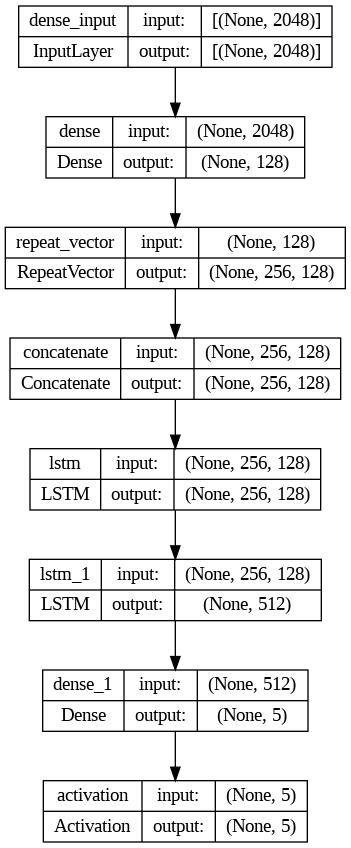

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.fit(X,y,epochs=1)

826/826 [==============================] - 35s 42ms/step - loss: 4.2836 - accuracy: 0.2745


In [ ]:
def pred(im):
    test_img=cv2.imread(im[0])
    test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    lol=cv2.resize(test_img,(224,224))
    lol=np.reshape(lol,(1,224,224,3))
  
    test_feature=my_model.predict(lol).reshape(1,2048)
    prediction=model.predict(test_feature)
    return prediction

In [ ]:
img_name=glob("/content/drive/MyDrive/data/personality-master/_G3kw9HwCqY.004.mp4-00161.jpg")

1/1 [==============================] - 0s 111ms/step
{'ValueExtraversion': 0.14752111, 'ValueAgreeableness': 0.25192404, 'ValueConscientiousness': 0.17707768, 'ValueNeurotisicm': 0.18332426, 'ValueOpenness': 0.24015294}


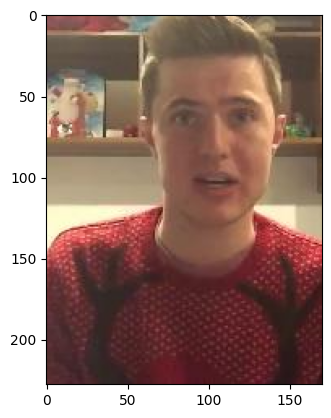

In [ ]:
v={}
p=pred(img_name)
v["ValueExtraversion"]=p[0][0]
v["ValueAgreeableness"]=p[0][1]
v["ValueConscientiousness"]=p[0][2]
v["ValueNeurotisicm"]=p[0][3]
v["ValueOpenness"]=p[0][4]
print(v)